# Valley analysis in LSDTopoTools

Wlecome to `plot-valley-analysis`! In order to run this notebook you need to have followed the installation instructions on the `lsdtt-notebooks` GitHub repository and make sure you have `lsdviztools` installed. This notebook plots the results of the LSDTopoTools valley analysis code. It will produce map plots of the valley defined from LSDTT. It also has a number of different options depending on what you're interested in doing. 

If you chose to run the terrace extraction it will make:
* Separate map plots of the floodplain and the terraces

If you chose to measure valley width it will make:
* Plots of the valley width vs distance downstream
* Map plots of the valley width measurements

**NOTE: This is a work in progress!** 

------------------------------------------------------

**If you use this code please cite**: Clubb, F. J., Mudd, S. M., Milodowski, D. T., Valters, D. A., Slater, L. J., Hurst, M. D., and Limaye, A. B.: Geomorphometric delineation of floodplains and terraces from objectively defined topographic thresholds, Earth Surf. Dynam., 5, 369–385, https://doi.org/10.5194/esurf-5-369-2017, 2017.

------------------------------------------------------

## Package imports and declaring variables

Import required packages and define the data directory and DEM name here.

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, LineString, MultiLineString
from pyproj import Transformer
import os
import numpy as np
import matplotlib.patches as mpatches

# import some lsdtt modules
# import lsdviztools.lsdbasemaptools as bmt
# from lsdviztools.lsdplottingtools import lsdmap_gdalio as gio
# import lsdviztools.lsdmapwrappers as lsdmw
# import lsdttparamselector as ps

Let's define the data directory and the prefix of your DEM. **The path to the folder MUST have a '/' at the end.**

In [2]:
DataDirectory = '/mnt/c/Users/eliot/Linux/DEMS/Switzerland/Birs/Valley_Centreline/Birs_Test11_180621/'
Base_file = "Birs_T11_Clipped"

## Valley plotting

This section makes map plot of the valley. First we'll read in the valley raster and make a plot against the shaded relief.

**NOTE: this is commented out at the moment due to issues with pip version of lsdviztools**

In [3]:
# %matplotlib inline
# Drape_prefix = Base_file+"_valley"
# valley_img = lsdmw.BinaryDrape(DataDirectory,Base_file, Drape_prefix, cmap = "GnBu_r", alpha=1, save_fig=True)

## Valley width

In this section we'll make some plots of the valley width against distance.

In [4]:
# Read in the valley width geojson
widths = gpd.read_file(DataDirectory+Base_file+'_valley_widths.geojson')
widths = widths[widths['total_valley_width'] > 0]

In [5]:
# get the mean valley width
mean_width = widths['total_valley_width'].mean()

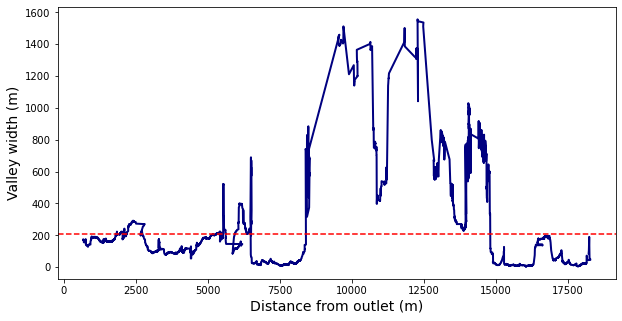

In [6]:
# plot the raw width data
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,5))
ax.plot(widths['distance_from_outlet'], widths['total_valley_width'], c='navy', lw=2)
ax.axhline(mean_width, ls='--', c='r')
ax.set_xlabel('Distance from outlet (m)', fontsize=14)
ax.set_ylabel('Valley width (m)', fontsize=14)
plt.show()

In [7]:
# make a plot of the rolling average of widths

In [8]:
reach_length = 100    # set the reach length to average over in metres
widths['rolling_width'] = widths.rolling(reach_length, center=True).mean()['total_valley_width']
widths['rolling_width_std'] = widths.rolling(reach_length, center=True).std()['total_valley_width']

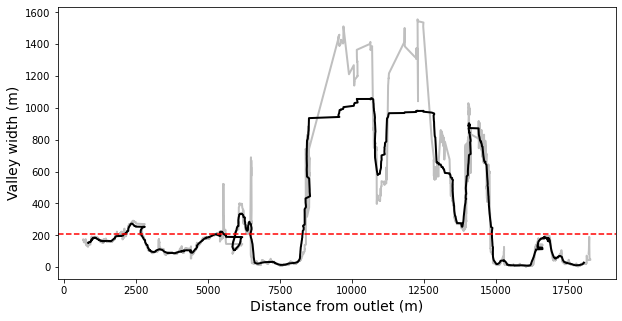

In [9]:
# plot the rolling width data
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,5))
ax.plot(widths['distance_from_outlet'], widths['total_valley_width'], c='0.5', lw=2, alpha=0.5)
ax.plot(widths['distance_from_outlet'], widths['rolling_width'], c='k', lw=2)
ax.axhline(mean_width, ls='--', c='red')
ax.set_xlabel('Distance from outlet (m)', fontsize=14)
ax.set_ylabel('Valley width (m)', fontsize=14)
plt.show()

In [10]:
widths

,latitude,longitude,distance_from_outlet,flow_bearing,left_valley_width,node,orthogonal_bearing,right_valley_width,total_valley_width,geometry,rolling_width,rolling_width_std
0,47.315008,7.390713,18221.291000,176.829880,73.089943,19124514,266.829895,10.997279,86.071678,"LINESTRING (7.39071 47.31501, 7.39074 47.31503)",NaN,NaN
1,47.315026,7.390739,18229.775400,165.472702,92.122261,19120756,255.472702,11.646230,105.747185,"LINESTRING (7.39074 47.31503, 7.39077 47.31504)",NaN,NaN
2,47.315045,7.390765,18241.775400,157.500000,173.885529,19116998,247.500000,14.228026,190.110809,"LINESTRING (7.39077 47.31504, 7.39076 47.31506)",NaN,NaN
3,47.315063,7.390764,18250.603500,150.338623,41.179859,19113239,240.338623,15.120774,58.295101,"LINESTRING (7.39076 47.31506, 7.39074 47.31506)",NaN,NaN
4,47.315062,7.390738,18252.603500,148.282532,39.487148,19113238,238.282532,13.418885,54.904541,"LINESTRING (7.39074 47.31506, 7.39071 47.31508)",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
6655,47.394067,7.415440,680.972107,98.510261,69.693436,2679913,188.510254,102.221985,173.910995,"LINESTRING (7.41544 47.39407, 7.41547 47.39405)",NaN,NaN
6656,47.394049,7.415467,679.800781,101.309921,72.330582,2683673,191.309921,98.995506,173.323792,"LINESTRING (7.41547 47.39405, 7.41549 47.39405)",NaN,NaN
6657,47.394050,7.415493,677.801270,98.510261,71.673393,2683674,188.510254,99.950523,173.623398,"LINESTRING (7.41549 47.39405, 7.41552 47.39405)",NaN,NaN
6658,47.394050,7.415520,675.801758,98.510261,71.673393,2683675,188.510254,97.970711,171.643311,"LINESTRING (7.41552 47.39405, 7.41555 47.39405)",NaN,NaN


## Plotting a single reach along the valley centreline
This section is useful if you have run the code in tiles and want to make a composite plot of the valley width along the full valley. You will need a merged centreline of the valley as a line shapefile.

In [11]:
# Read in the valley width geojson
widths = gpd.read_file(DataDirectory+Base_file+'_valley_widths.geojson')
widths = widths[widths['total_valley_width'] > 0]

In [12]:
# name and path of the merged centreline
centreline_shp = '/mnt/c/Users/eliot/Linux/DEMS/Switzerland/Birs/Valley_Centreline/Birs_valley_centreline_final.shp'
# the UTM EPSG code of your region. You need to set this so we can get the correct distances in metres.
UTM_EPSG_code = 'epsg:32632'

In [13]:
# now read in the centreline to a geopandas geodataframe
centreline = gpd.read_file(centreline_shp)

# get the centreline in UTM
centreline_utm = centreline.to_crs(UTM_EPSG_code)
# set up the pyproj transformer
transformer = Transformer.from_crs("epsg:4326", UTM_EPSG_code)

In [14]:
# get the distance of the widths along the line
def get_distance_along_line(row):
    #point = Point(row['longitude'], row['latitude'])
    # convert the point to UTM
    point = Point(transformer.transform(row['latitude'], row['longitude']))
    # getting the distance of the point along the line
    distance = centreline_utm.project(point)
    return(distance)
    
widths['centreline_dist'] = widths.apply(get_distance_along_line, axis=1)

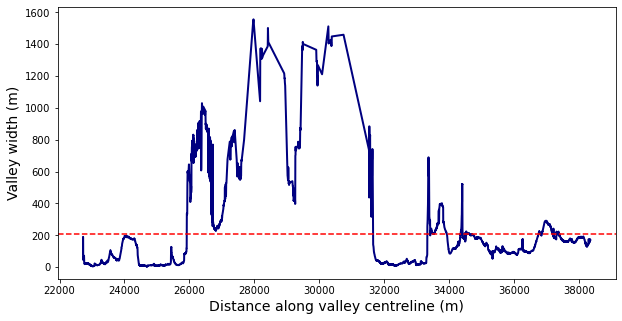

In [15]:
# make a plot of the valley width vs. distance along the merged centreline
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,5))
ax.plot(widths['centreline_dist'], widths['total_valley_width'], c='navy', lw=2)
ax.axhline(mean_width, ls='--', c='r')
ax.set_xlabel('Distance along valley centreline (m)', fontsize=14)
ax.set_ylabel('Valley width (m)', fontsize=14)
plt.show()

## Plotting all the reaches along the valley centreline
In this section we will loop through all the directories in your subfolder and make a composite plot of the widths for each one.

In [16]:
# define the name of the base directory that you want to loop through
base_dir = '/mnt/c/Users/eliot/Linux/DEMS/Switzerland/Birs/Valley_Centreline/'
#base_dir = '/media/TopographicData/TopographicData/valley_width/Switzerland/Birs/Valley_Centreline/'
# the name of the centreline shapefile - I am assuming it is located in the base directory
centreline_shp = base_dir+'Birs_valley_centreline_final.shp'
# the UTM EPSG code of your region. You need to set this so we can get the correct distances in metres.
UTM_EPSG_code = 'epsg:32632'

In [17]:
# now read in the centreline to a geopandas geodataframe
centreline = gpd.read_file(centreline_shp)
#centreline = centreline.dissolve()

# get the centreline in UTM
centreline_utm = centreline.to_crs(UTM_EPSG_code)
# set up the pyproj transformer
transformer = Transformer.from_crs("epsg:4326", UTM_EPSG_code)

# set up the master dataframe for storing all the width data together
widths = gpd.GeoDataFrame()

In [18]:
centreline

,path,begin,end,geometry
0,Birs_T10_centreline_nodes.shp|layername=Birs_T...,2302570.0,9203750.0,"MULTILINESTRING ((7.21785 47.23365, 7.21787 47..."


In [19]:
# get the distance of the widths along the line. This just defines the code that will do this, but won't actually
# do anything until the next block.
def get_distance_along_line(row):
    #point = Point(row['longitude'], row['latitude'])
    # convert the point to UTM
    point = Point(transformer.transform(row['latitude'], row['longitude']))
    # getting the distance of the point along the line
    distance = centreline_utm.project(point)
    return(distance)

In [20]:
# loop through the subdirectories and read in the valley width geojsons, calculate the distance along the centreline
# and write to a new geodataframe. This might be slow!
for root, subdirs, files in os.walk(base_dir):
    for file in files:
        if '_valley_widths.geojson' in file:
            this_gdf = gpd.read_file(os.path.join(root,file))
            this_gdf = this_gdf[this_gdf['total_valley_width'] > 0]
            #this_gdf = this_gdf.drop(columns=['distance_from_outlet', 'node'])
            this_gdf['centreline_dist'] = this_gdf.apply(get_distance_along_line, axis=1)
            widths = widths.append(this_gdf, ignore_index=True)

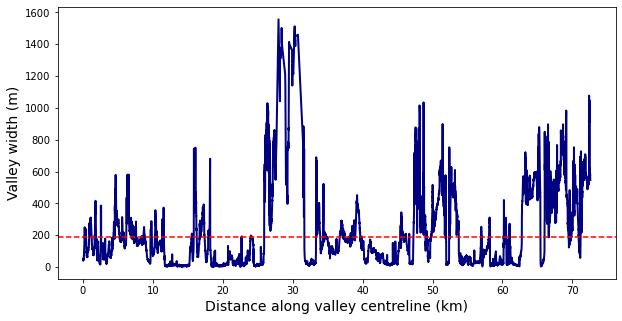

In [21]:
# sort by the distance along the centreline to make sure we're plotting in the right order
widths = widths.sort_values(by='centreline_dist')

# get the mean valley width
mean_width = widths['total_valley_width'].mean()

# make a plot of the valley width vs. distance along the merged centreline
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,5))
ax.plot(widths['centreline_dist']/1000, widths['total_valley_width'], c='navy', lw=2)
ax.axhline(mean_width, ls='--', c='r')
ax.set_xlabel('Distance along valley centreline (km)', fontsize=14)
ax.set_ylabel('Valley width (m)', fontsize=14)
plt.show()
fig.savefig(base_dir+'Birs_valley_width.png', transparent=False)

## Bedrock geology

Add the plotting of the bedrock geology. We will load in the geology shapefile to a dataframe of polygons using geopandas. For each point along the valley centreline, we'll look to see if it intersects one of the polygons and assign it the appropriate bedrock type.

In [22]:
# read in the geology shapefile to a geopandas geodataframe
geology_gdf = gpd.read_file('/mnt/c/Users/eliot/Linux/DEMS/Switzerland/Birs/Valley_Centreline/Geological_Investigation/Birs_Bedrock_Merged.shp')
#geology_gdf = gpd.read_file('/media/TopographicData/TopographicData/valley_width/Switzerland/Birs/Geology/Birs_Bedrock_Merged.shp')

In [23]:
# this is how you can check the coordinate system of a geodataframe.
geology_gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [24]:
# change to UTM so we can do the buffering in metres
widths_utm = widths.to_crs(UTM_EPSG_code)
# buffer each part of the centreline to create a polygon that's 50 m in width
widths_utm['centreline_buffer'] = widths_utm['geometry'].buffer(150)
# convert back to WGS84
widths_utm['geometry'] = widths_utm['centreline_buffer']
buffered_widths = widths_utm.to_crs('epsg:4326')

In [25]:
buffered_widths

,latitude,longitude,distance_from_outlet,flow_bearing,left_valley_width,node,orthogonal_bearing,right_valley_width,total_valley_width,geometry,centreline_dist,centreline_buffer
26390,47.233746,7.218067,13826.981400,57.653317,20.628973,7352453,147.653320,20.628973,43.257526,"POLYGON ((7.21666 47.23470, 7.21680 47.23479, ...",22.711352,"POLYGON ((365016.928 5232787.944, 365027.824 5..."
26391,47.233764,7.218092,13826.981400,55.882774,20.628973,7345183,145.882782,22.319118,44.934971,"POLYGON ((7.21668 47.23471, 7.21682 47.23481, ...",25.536874,"POLYGON ((365018.924 5232789.944, 365029.820 5..."
26392,47.233783,7.218118,13824.153300,56.583839,20.628973,7337913,146.583832,22.319118,44.934971,"POLYGON ((7.21810 47.23513, 7.21830 47.23513, ...",28.246703,"POLYGON ((365127.257 5232833.996, 365141.959 5..."
26393,47.233783,7.218145,13822.153300,59.753937,25.071543,7337914,149.753937,20.628973,47.697422,"POLYGON ((7.21672 47.23472, 7.21686 47.23482, ...",30.377649,"POLYGON ((365021.936 5232790.963, 365032.740 5..."
26394,47.233802,7.218170,13819.325200,59.747536,19.587145,7330644,149.747528,22.319118,43.899773,"POLYGON ((7.21676 47.23475, 7.21690 47.23484, ...",33.178591,"POLYGON ((365024.901 5232793.944, 365035.797 5..."
...,...,...,...,...,...,...,...,...,...,...,...,...
26385,47.538601,7.620718,823.081970,45.000000,389.199646,615638,135.000000,160.169617,551.368652,"POLYGON ((7.62071 47.53995, 7.62091 47.53995, ...",72556.237369,"POLYGON ((396200.767 5266091.501, 396215.468 5..."
26386,47.538601,7.620745,822.253845,46.663700,390.820099,615639,136.663696,161.638702,554.455811,"POLYGON ((7.61934 47.53956, 7.61948 47.53965, ...",72558.248059,"POLYGON ((396096.816 5266049.847, 396107.749 5..."
26387,47.538619,7.620771,825.081360,46.663700,390.820099,613214,136.663696,158.812149,551.629578,"POLYGON ((7.61937 47.53958, 7.61951 47.53967, ...",72561.083097,"POLYGON ((396098.846 5266051.866, 396109.781 5..."
26388,47.538638,7.620797,827.908875,46.663700,392.189911,610789,136.663696,155.985626,550.174744,"POLYGON ((7.61938 47.53959, 7.61952 47.53968, ...",72563.917741,"POLYGON ((396099.843 5266052.885, 396110.687 5..."


In [26]:
# find if each centreline polygon intserects the geology. To do this we use what's called a "spatial join"
# it will join the polygon from the geology shapefile with the widths dataframe if they intersect in geographic space.
widths_plus_geology = gpd.sjoin(buffered_widths, geology_gdf, how='left', op='intersects')

In [27]:
# geopandas doesn't like it if there is more than one column with a shape in it. so let's remove the buffered shapes.
widths_plus_geology = widths_plus_geology.drop(columns=('centreline_buffer'))

In [28]:
# let's write the new dataframe to a shapefile so we can load it in to QGIS and test if it worked
widths_plus_geology.to_file('/mnt/c/Users/eliot/Linux/DEMS/Switzerland/Birs/Valley_Centreline/Geological_Investigation/Birs_widths_plus_geology.shp')

<ipython-input-28-902b54bc7421>:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  widths_plus_geology.to_file('/mnt/c/Users/eliot/Linux/DEMS/Switzerland/Birs/Valley_Centreline/Geological_Investigation/Birs_widths_plus_geology.shp')


In [29]:
widths_plus_geology

,latitude,longitude,distance_from_outlet,flow_bearing,left_valley_width,node,orthogonal_bearing,right_valley_width,total_valley_width,geometry,centreline_dist,index_right,SYMBOL,layer,path,LITHOLOGY,a
26390,47.233746,7.218067,13826.981400,57.653317,20.628973,7352453,147.653320,20.628973,43.257526,"POLYGON ((7.21666 47.23470, 7.21680 47.23479, ...",22.711352,164.0,15200341,Bedrock_147_Dissolved,"C:/Users/eliot/Durham University/CLUBB, FIONA ...",M,None
26391,47.233764,7.218092,13826.981400,55.882774,20.628973,7345183,145.882782,22.319118,44.934971,"POLYGON ((7.21668 47.23471, 7.21682 47.23481, ...",25.536874,164.0,15200341,Bedrock_147_Dissolved,"C:/Users/eliot/Durham University/CLUBB, FIONA ...",M,None
26392,47.233783,7.218118,13824.153300,56.583839,20.628973,7337913,146.583832,22.319118,44.934971,"POLYGON ((7.21810 47.23513, 7.21830 47.23513, ...",28.246703,164.0,15200341,Bedrock_147_Dissolved,"C:/Users/eliot/Durham University/CLUBB, FIONA ...",M,None
26393,47.233783,7.218145,13822.153300,59.753937,25.071543,7337914,149.753937,20.628973,47.697422,"POLYGON ((7.21672 47.23472, 7.21686 47.23482, ...",30.377649,164.0,15200341,Bedrock_147_Dissolved,"C:/Users/eliot/Durham University/CLUBB, FIONA ...",M,None
26394,47.233802,7.218170,13819.325200,59.747536,19.587145,7330644,149.747528,22.319118,43.899773,"POLYGON ((7.21676 47.23475, 7.21690 47.23484, ...",33.178591,164.0,15200341,Bedrock_147_Dissolved,"C:/Users/eliot/Durham University/CLUBB, FIONA ...",M,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26385,47.538601,7.620718,823.081970,45.000000,389.199646,615638,135.000000,160.169617,551.368652,"POLYGON ((7.62071 47.53995, 7.62091 47.53995, ...",72556.237369,NaN,NaN,NaN,NaN,NaN,NaN
26386,47.538601,7.620745,822.253845,46.663700,390.820099,615639,136.663696,161.638702,554.455811,"POLYGON ((7.61934 47.53956, 7.61948 47.53965, ...",72558.248059,NaN,NaN,NaN,NaN,NaN,NaN
26387,47.538619,7.620771,825.081360,46.663700,390.820099,613214,136.663696,158.812149,551.629578,"POLYGON ((7.61937 47.53958, 7.61951 47.53967, ...",72561.083097,NaN,NaN,NaN,NaN,NaN,NaN
26388,47.538638,7.620797,827.908875,46.663700,392.189911,610789,136.663696,155.985626,550.174744,"POLYGON ((7.61938 47.53959, 7.61952 47.53968, ...",72563.917741,NaN,NaN,NaN,NaN,NaN,NaN


['M' 'M_LS' nan 'SS' 'LS' 'C' 'M_SS']


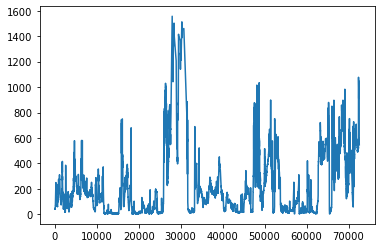

In [30]:
# This plots the valley width against the distance downstream of the shapefile
# We also define the individual categories within the lithology column
plt.plot(widths_plus_geology['centreline_dist'], widths_plus_geology['total_valley_width'])
lithology = widths_plus_geology['LITHOLOGY'].unique()

print(lithology)


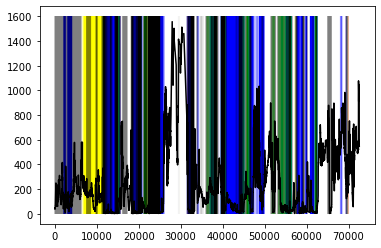

In [31]:
# Here we create a plot as above, and include a looped dataframe which will plot all lithologies downstream with a specific coloured bar
colours = ['grey', 'blue', 'grey', 'yellow', 'green', 'brown', 'salmon']
plt.plot(widths_plus_geology['centreline_dist'], widths_plus_geology['total_valley_width'], c='black', zorder=2)
for i, lith in enumerate(lithology): 
    this_df = widths_plus_geology[widths_plus_geology['LITHOLOGY'] == lith]
    plt.vlines(this_df['centreline_dist'], ymin=0, ymax=1600, colors=colours[i], alpha=0.005, zorder=1)


In [32]:
# Reading the edited csv sourced from the widths_plus_geology shapefile
lithologies = pd.read_csv('/mnt/c/Users/eliot/Linux/DEMS/Switzerland/Birs/Valley_Centreline/Geological_Investigation/Birs_Geology2.csv')
#lithologies = pd.read_csv('/media/TopographicData/TopographicData/valley_width/Switzerland/Birs/Geology/Birs_Geology.csv')

['M' 'M_LS' nan 'SS' 'LS' 'C' 'M_SS']


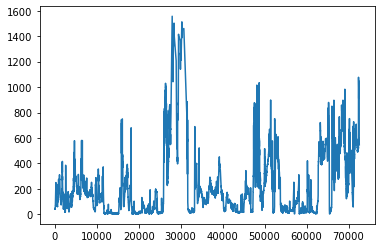

In [33]:
# This plots the valley width against the distance downstream of the csv
# We also define the individual categories within the lithology column
plt.plot(widths_plus_geology['centreline_dist'], widths_plus_geology['total_valley_width'])
litho = lithologies['LITHOLOGY'].unique()

print(litho)

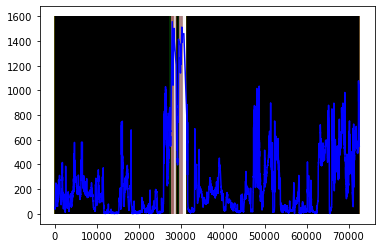

In [34]:
# IN PROGRESS: Here we create a plot as above, and include a looped dataframe which will plot all lithologies downstream as a coloured bar

colours = ['brown', 'blue', 'yellow', 'orange', 'green','brown','salmon' ]
plt.plot(lithologies['centreline'], lithologies['total_vall'], c='blue', zorder=2)
for i, lith in enumerate(litho): 
    this_df = lithologies[lithologies['LITHOLOGY'] == lith]
    plt.vlines(lithologies['centreline'], ymin=0, ymax=1600, colors=colours[i], alpha=0.5, zorder=1, linewidth=0.01)

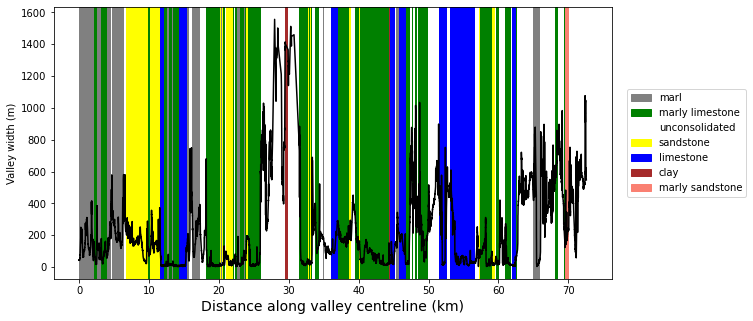

In [35]:
# Plot the lithology using the contacts rather than just a bar for each point
# bin the lithology data by the fault distance
these_liths = list(lithologies['LITHOLOGY'])
these_dists = list(lithologies['centreline']/1000)

# get the indices where the lithology changes
change_idx = np.where(np.roll(these_liths,1)!=these_liths)[0]
change_dists = lithologies['centreline'].iloc[change_idx]
unique_liths = list(litho)

# define the colours for each lithology
# ['M' '0' 'LS' 'SS' 'M_LS' 'C' 'M_SS']
colours = ['grey', 'green', 'white', 'yellow', 'blue','brown','salmon']
labels = {'M': 'marl', 'M_LS':'marly limestone','0':'unconsolidated', 'SS':'sandstone', 'LS':'limestone', 'C':'clay', 'M_SS':'marly sandstone'}

# figure size
plt.figure(figsize=(10,5))

# loop through each index where it changes and plot the vspan
for j, idx in enumerate(change_idx):
    if j == 0:
        min_dist = 0
    else:
        min_dist = these_dists[change_idx[j-1]]
    max_dist = these_dists[idx]
    # lithology of this bar
    # get the index of this lithology code
    lith_code = these_liths[change_idx[j-1]]
    this_idx = unique_liths.index(lith_code)
    #print(this_idx)
    # now add the bar
    plt.axvspan(min_dist, max_dist, color=colours[this_idx], alpha=1)
    
# now plot the valley widths
plt.plot(lithologies['centreline']/1000, lithologies['total_vall'], c='k', zorder=2)

# axis labels
plt.xlabel('Distance along valley centreline (km)', fontsize=14)
plt.ylabel('Valley width (m)')

# legend

handles = []
for i, l in enumerate(labels):
    handles.append(mpatches.Patch(color=colours[i], label=labels[l], alpha=1))

plt.legend(handles=handles, loc='center right', bbox_to_anchor=(1.25, 0.5))


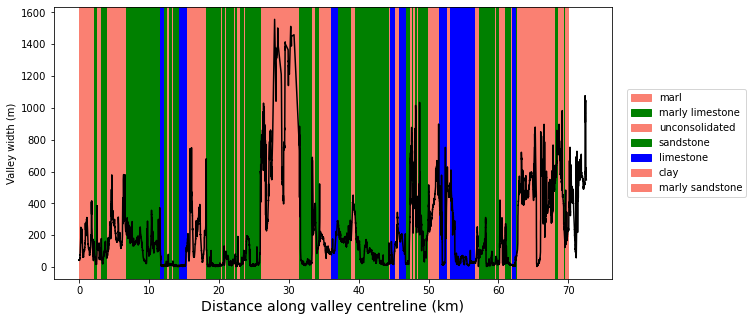

In [34]:
# Plot the lithology using the contacts in terms of soft, medium and hard
# bin the lithology data by the fault distance
these_liths = list(lithologies['LITHOLOGY'])
these_dists = list(lithologies['centreline']/1000)

# get the indices where the lithology changes
change_idx = np.where(np.roll(these_liths,1)!=these_liths)[0]
change_dists = lithologies['centreline'].iloc[change_idx]
unique_liths = list(litho)

# define the colours for each lithology
# ['M' '0' 'LS' 'SS' 'M_LS' 'C' 'M_SS']
colours = ['salmon', 'green', 'salmon', 'green', 'blue','salmon','salmon']
labels = {'M': 'marl', 'M_LS':'marly limestone','0':'unconsolidated', 'SS':'sandstone', 'LS':'limestone', 'C':'clay', 'M_SS':'marly sandstone'}

# figure size
plt.figure(figsize=(10,5))

# loop through each index where it changes and plot the vspan
for j, idx in enumerate(change_idx):
    if j == 0:
        min_dist = 0
    else:
        min_dist = these_dists[change_idx[j-1]]
    max_dist = these_dists[idx]
    # lithology of this bar
    # get the index of this lithology code
    lith_code = these_liths[change_idx[j-1]]
    this_idx = unique_liths.index(lith_code)
    #print(this_idx)
    # now add the bar
    plt.axvspan(min_dist, max_dist, color=colours[this_idx], alpha=1)
    
# now plot the valley widths
plt.plot(lithologies['centreline']/1000, lithologies['total_vall'], c='k', zorder=2)

# axis labels
plt.xlabel('Distance along valley centreline (km)', fontsize=14)
plt.ylabel('Valley width (m)')

# legend

handles = []
for i, l in enumerate(labels):
    handles.append(mpatches.Patch(color=colours[i], label=labels[l], alpha=1))

plt.legend(handles=handles, loc='center right', bbox_to_anchor=(1.25, 0.5))